# Import Libraries and Data

In [10]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
from matplotlib import pyplot as plt # plotting/graphing
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # Decision tree algorithm and plotting functions for the Decision tree
from sklearn.metrics import accuracy_score # accuracy metric

Note: If you are using Google Colab, you must upload the training and testing CSVs from Canvas by doing the following:

* On the left-side bar, click the folder icon.
* Click the 'Upload to session storage' button.
* Upload the two CSV files; they will appear below the 'sample_data' folder.

**Unfortunately, this process must be done every time the runtime is disconnected - just a quirk with Google Colab.**

If you are using Jupyter notebook, just make sure the training and testings CSV files are in the same folder location as this .ipynb file.

In [11]:
training_df = pd.read_csv('training_data.csv',index_col=0)
testing_df = pd.read_csv('testing_data.csv',index_col=0)

# Instructions and Workspace

**For this Instapoll assignment, your task is to use Scikit-Learn, Pandas, and matplotlib to create a learning curve based on the British Bank dataset.**

As a reminder, the learning curve is a graphical representation of how test accuracy (the y-axis) generally improves as you increase the size of the training set. It helps to diagnose the bias and variance in the model and show how a model benefits from adding more training data.

Here is our recommended approach to produce the learning curve:

**1. Setup an Outer Loop:**
  - Use a *for loop* to incrementally increase the training set size.
  - Start from 1% and increase up to 100% in 1% increments.
  - Hint: Utilize [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to generate sample fractions.

**2. Inner Loop - Process Each Sample:**
- For each fraction from the outer loop, execute the following steps:
  - Data Sampling:
      - Randomly select a sample of the training data corresponding to the current fraction.
      - Hint: Use [.sample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) on the training dataframe.
  - Variable Setting:
    -  Define your feature set (X) and target variable (y) based on the sampled data.
  - Model Fitting:
    - Construct and fit a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with these specific parameters: `(criterion='entropy', max_depth=5, random_state=3)`.
  - Performance Evaluation:
    - Predict on the testing data and calculate the accuracy using [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).
  - **Repetition for Stability:**
    - **Repeat the previous four instructions ten times for each sample size.**
    - Compute the average accuracy for these ten iterations using [np.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html/).
    - Hint: Maintain a list to store accuracies for each iteration.

**3. Accumulate Results:**
- Outside the inner loop, append each average accuracy and corresponding sample size (in percentage) to separate lists.

**4. Plot the Learning Curve:**
- Using Matplotlib, plot the average accuracies against their respective sample sizes.
- Label the plot appropriately (title, x-axis, y-axis).

Here is some psuedo-code to help you get started!

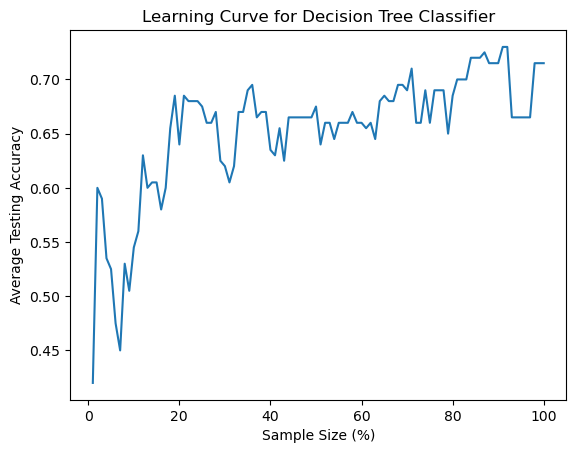

In [12]:
# Initialize lists to store sample sizes and average accuracies
sample_sizes = []
avg_accuracies = []

# Outer loop for gradually increasing the sample size
for sample_fraction in np.linspace(1, 100, num = 100): # Fill in function values
    # Initialize a list to store accuracies for each iteration
    accuracies = []

    # Inner loop for multiple iterations at each fraction
    for i in range(10): # Fill in function value
        # Sample data from the training set
        sampled_data = training_df.sample(frac = sample_fraction/100, random_state = 3) # Fill in function parameter

        # Separate features and target variable from the sampled data
        X_train = sampled_data.drop(columns=['pep'])
        y_train = sampled_data['pep']

        # Define and fit the decision tree model
        model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=3).fit(X_train,y_train) # Fill in function parameters

        # Predict on the testing data and calculate accuracy
        X_test = testing_df.drop(columns = ['pep'])
        y_test = testing_df.pep
        accuracy = accuracy_score(model.predict(X_test), y_test) # Fill in function parameters

        # Append the calculated accuracy to the accuracies list
        accuracies.append(accuracy)

    # Calculate the average accuracy for this sample size and store it
    sample_sizes.append(sample_fraction)
    avg_accuracies.append(np.mean(accuracies))
    

# Plot the learning curve using Matplotlib
#print(sample_sizes)
#print(avg_accuracies)

plt.plot(sample_sizes, avg_accuracies)
plt.xlabel('Sample Size (%)')
plt.ylabel('Average Testing Accuracy')
plt.title('Learning Curve for Decision Tree Classifier')
plt.show()

**Your end result should look something like the following:**

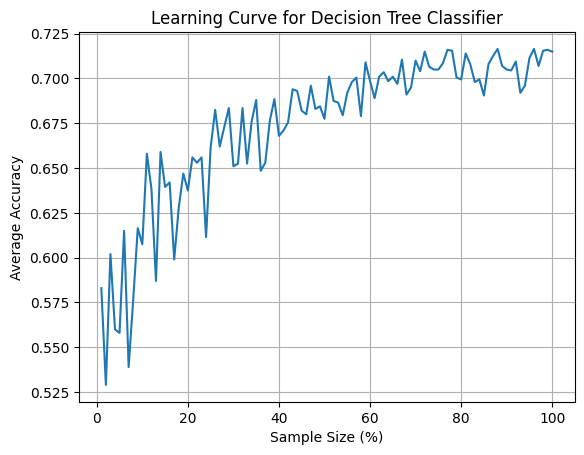

In [ ]:
# Do not run this cell! If you do by accident, you can redownload this file from Canvas.

**Please perform your coding in the cell(s) below and try your best! You are not required to follow the instructions we have provided explicitly if you discover a more efficient methodology.**

**If you have any questions, please reach out to the Professor or TA!**